# Data Preparation using pandas

An initial step in statistical data analysis is the preparation of the data to be used in the analysis. In practice, ~~a little~~ ~~some~~ ~~much~~ the majority of the actual time spent on a statistical modeling project is typically devoted to importing, cleaning, validating and transforming the dataset.

This section will introduce [pandas](http://pandas.pydata.org/), an important third-party Python package for data analysis, as a tool for data preparation, and provide some general advice for what should or should not be done to data before it is analyzed.

## Introduction to pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- **Tabular** data with heterogeneously-typed columns, as you might find in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series** data.
- Arbitrary **matrix** data with row and column labels

Virtually any statistical dataset, labeled or unlabeled, can be converted to a pandas data structure for cleaning, transformation, and analysis.


### Key features
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115])

In [4]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available. These counts are of bacteria taxa constituting the microbiome of hospital patients, so using the taxon of each bacterium is a useful index.

In [5]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [6]:
bacteria['Actinobacteria']

569

In [7]:
bacteria[bacteria.index.str.endswith('bacteria')]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [8]:
'Bacteroidetes' in bacteria

True

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [9]:
bacteria[0]

632

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [10]:
np.log(bacteria)

Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
dtype: float64

We can also filter according to the values in the `Series`:

In [11]:
bacteria[bacteria>1000]

Proteobacteria    1638
dtype: int64

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. pandas uses the `NaN` (not a number) type for missing values.

In [12]:
bacteria2 = pd.Series(bacteria, 
                      index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [13]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [14]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [15]:
bacteria_data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
bacteria_data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


A `DataFrame` has a second index, representing the columns:

In [16]:
bacteria_data.columns

Index(['value', 'patient', 'phylum'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [17]:
bacteria_data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [18]:
bacteria_data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

If we want access to a row in a `DataFrame`, we index its `loc` attribute.

In [19]:
bacteria_data.loc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

Since a row potentially contains different data types, the returned `Series` of values is of the generic `object` type.

# Using pandas

This section, we will import and clean up some of the datasets that we will be using later on in the tutorial. And in doing so, we will introduce the key functionality of pandas that is required to use the software effectively.

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

### Delimited data

The file `olympics.1996.txt` in the `data` directory contains counts of medals awarded at the 1996 Summer Olympic Games by country, along with the countries' respective population sizes. This data is stored in a tab-separated format.

![olympics](images/_olympics.png)

In [20]:
!head ../data/olympics.1996.txt

Tonga	1	96165
Bahamas	1	281584
Jamaica	6	2589043
Cuba	25	10952046
Australia	41	18348078
Hungary	21	10273590
Bulgaria	15	8181047
Trinidad & Tobago	2	1196910
New Zealand	6	3621200
Norway	7	4381275


This table can be read into a DataFrame using `read_table`. 

In [21]:
medals = pd.read_csv('../data/olympics.1996.txt', sep='\t',
                     index_col=0,
                     header=None, 
                     names=['country', 'medals', 'population'])
medals.head()

,medals,population
country,,
Tonga,1,96165
Bahamas,1,281584
Jamaica,6,2589043
Cuba,25,10952046
Australia,41,18348078


There is no header row in this dataset, so we specified this, and provided our own **header names**. If we did not specify `header=None` the function would have assumed the first row contained column names.

The tab **separator** was passed to the `sep` argument as `\t`.

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately common in some datasets: 
    
    sep='\s+'

### Scraping Data from the Web

We would like to add another variable to this dataset. Along with population, a country's economic development may be a useful predictor of Olympic success. A very simple indicator of this might be OECD membership status. 

The [OECD website](http://www.oecd.org/about/membersandpartners/list-oecd-member-countries.htm) contains a table listing OECD member nations, along with its year of membership. We would like to import this table and extract the contries that were members as of the 1996 games.

The `read_html` function accepts a URL argument, and will attempt to extract all the tables from that address, returning whatever it finds in a **list of `DataFrame`s**.

In [22]:
oecd_site = 'http://www.oecd.org/about/membersandpartners/list-oecd-member-countries.htm'
pd.read_html(oecd_site)

[                                                   0
 0  On 14 December 1960, 20 countries originally s...
 1  Here is a list of the current Member countries...,
                                      0                                   1  \
 0                                  NaN                             Country   
 1                                  NaN                           AUSTRALIA   
 2                                  NaN                             AUSTRIA   
 3                                  NaN                             BELGIUM   
 4                                  NaN                              CANADA   
 5                                  NaN                               CHILE   
 6                                  NaN                      CZECH REPUBLIC   
 7                                  NaN                             DENMARK   
 8                                  NaN                             ESTONIA   
 9                                  NaN        

There is typically some cleanup that is required of the returned data, such as the assignment of column names or conversion of types. 

The table of interest is at index 1, and we will extract two columns from the table. Otherwise, this table is pretty clean.

In [23]:
oecd = pd.read_html(oecd_site, header=0)[1][['Country', 'Date']]
oecd.head()

,Country,Date
0,AUSTRALIA,7 June 1971
1,AUSTRIA,29 September 1961
2,BELGIUM,13 September 1961
3,CANADA,10 April 1961
4,CHILE,7 May 2010


There is some junk at the end of the table:

In [24]:
oecd.tail()

,Country,Date
32,SWITZERLAND,28 September 1961
33,TURKEY,2 August 1961
34,UNITED KINGDOM,2 May 1961
35,UNITED STATES,12 April 1961
36,More on membership and enlargement,More on membership and enlargement


In [25]:
oecd = oecd[:-1]

In [26]:
oecd['year'] = pd.to_datetime(oecd.Date).apply(lambda x: x.year)
oecd_year = oecd.set_index(oecd.Country.str.title())['year'].dropna()
oecd_year

Country
Australia          1971
Austria            1961
Belgium            1961
Canada             1961
Chile              2010
Czech Republic     1995
Denmark            1961
Estonia            2010
Finland            1969
France             1961
Germany            1961
Greece             1961
Hungary            1996
Iceland            1961
Ireland            1961
Israel             2010
Italy              1962
Japan              1964
Korea              1996
Latvia             2016
Lithuania          2018
Luxembourg         1961
Mexico             1994
Netherlands        1961
New Zealand        1973
Norway             1961
Poland             1996
Portugal           1961
Slovak Republic    2000
Slovenia           2010
Spain              1961
Sweden             1961
Switzerland        1961
Turkey             1961
United Kingdom     1961
United States      1961
Name: year, dtype: int64

We can create an indicator (binary) variable for OECD status by checking if each country is in the index of countries with membership year less than 1997. 

The `DataFrame` method `assign` is a convenient means for creating the new column from this operation.

In [27]:
medals_data = medals.assign(oecd=medals.index.isin((oecd_year[oecd_year<1997]).index).astype(int))

Since the distribution of populations spans several orders of magnitude, we may wish to use the logarithm of the population size, which may be created similarly.

In [28]:
medals_data = medals_data.assign(log_population=np.log(medals.population))

The NumPy `log` function will return a pandas `Series` (or `DataFrame` when applied to one) instead of a `ndarray`; all of NumPy's functions are compatible with pandas in this way.

In [29]:
medals_data.head()

,medals,population,oecd,log_population
country,,,,
Tonga,1,96165,0,11.473821
Bahamas,1,281584,0,12.548186
Jamaica,6,2589043,0,14.766799
Cuba,25,10952046,0,16.209037
Australia,41,18348078,1,16.725035


### Hierarchical Indices

It is good practice to use DataFrame indices that are **unique**, but this can often not be achieved using a single column. In the case of the microbiome data, we can specify the first two columns, which together provide a unique index to the data.

In [30]:
mb = pd.read_csv("../data/microbiome/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a **hierarchical index**, which allows multiple dimensions of data to be represented in tabular form.

In [31]:
mb.index

MultiIndex(levels=[['Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Other', 'Proteobacteria'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           codes=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           names=['Taxon', 'Patient'])

The corresponding index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, pandas does not print the repeats, making it easy to identify groups of values.

Rows can be indexed by passing the appropriate tuple.

In [32]:
mb.loc[('Firmicutes', 2)]

Tissue     136
Stool     4182
Name: (Firmicutes, 2), dtype: int64

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [33]:
mb.loc['Proteobacteria']

,Tissue,Stool
Patient,,
1,1638,3886
2,2469,1821
3,839,661
4,4414,18
5,12044,83
6,2310,12
7,3053,547
8,395,2174
9,2651,767


To extract arbitrary levels from a hierarchical row index, the **cross-section** method `xs` can be used.

In [34]:
mb.xs(1, level='Patient')

,Tissue,Stool
Taxon,,
Firmicutes,632,305
Proteobacteria,1638,3886
Actinobacteria,569,648
Bacteroidetes,115,380
Other,114,277


We may also reorder levels as we like.

In [35]:
mb.swaplevel('Patient', 'Taxon').head()

,,Tissue,Stool
Patient,Taxon,,
1,Firmicutes,632,305
2,Firmicutes,136,4182
3,Firmicutes,1174,703
4,Firmicutes,408,3946
5,Firmicutes,831,8605


### Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as calculating the ratio of bacteria counts between locations:

In [36]:
mb.Stool / mb.Tissue

Taxon           Patient
Firmicutes      1           0.482595
                2          30.750000
                3           0.598807
                4           9.671569
                5          10.354994
                6           0.072150
                7           0.998607
                8           0.190751
                9           0.350877
                10         19.728395
                11          0.086022
                12          1.024912
                13         15.579439
                14          2.322917
                15          8.459075
Proteobacteria  1           2.372405
                2           0.737546
                3           0.787843
                4           0.004078
                5           0.006891
                6           0.005195
                7           0.179168
                8           5.503797
                9           0.289325
                10          0.063598
                11          0.115940
              

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The `read_excel` convenience function in pandas imports a specific sheet from an Excel file.

In [37]:
mb = pd.read_excel('../data/microbiome/MID2.xls', sheet_name='Sheet 1', header=None)
mb.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


## 2014 Ebola Outbreak Data

The `../data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

![ebola](images/ebola.jpg)

From these data files, use pandas to import them and create a single data frame that includes the **daily totals of new cases** for each country. 

We may use this compiled data for more advaned applications later in the course.

The data are taken from [Caitlin Rivers' `ebola` GitHub repository](https://github.com/cmrivers/ebola), and are licenced for both commercial and non-commercial use. The tutorial repository contains a subset of this data from three countries (Sierra Leone, Liberia and Guinea) that we will use as an example. They reside in a nested subdirectory in the `data` directory.

In [38]:
ebola_dirs = !ls ../data/ebola/
ebola_dirs

['LICENSE', 'guinea_data', 'liberia_data', 'sl_data']

Within each country directory, there are CSV files containing daily information regarding the state of the outbreak for that country. The first step is to efficiently import all the relevant files. 

Our approach will be to construct a dictionary containing a list of filenames to import. We can use the `glob` package to identify all the CSV files in each directory. This can all be placed within a **dictionary comprehension**.

In [39]:
import glob

filenames = {data_dir[:data_dir.find('_')]: glob.glob('../data/ebola/{0}/*.csv'.format(data_dir)) for data_dir in ebola_dirs[1:]}

We are now in a position to iterate over the dictionary and import the corresponding files. However, the data layout of the files across the dataset is partially inconsistent.

In [40]:
pd.read_csv('../data/ebola/sl_data/2014-08-12-v77.csv').head()

,date,variable,Kailahun,Kenema,Kono,Kambia,Koinadugu,Bombali,Tonkolili,Port Loko,Pujehun,Bo,Moyamba,Bonthe,Western area urban,Western area rural,National
0,2014-08-12,population,465048,653013,325003.0,341690.0,335471.0,494139,434937,557978,335574,654142,278119,168729.0,1040888,263619,6348350
1,2014-08-12,new_noncase,0,3,0.0,0.0,0.0,0,0,1,0,0,0,0.0,0,0,4
2,2014-08-12,new_suspected,0,9,0.0,0.0,0.0,0,0,0,0,1,0,0.0,0,0,10
3,2014-08-12,new_probable,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0.0,0,0,1
4,2014-08-12,new_confirmed,0,9,0.0,0.0,0.0,0,0,2,0,0,0,0.0,0,0,11


In [41]:
pd.read_csv('../data/ebola/guinea_data/2014-09-02.csv').head()

,Date,Description,Totals,Conakry,Gueckedou,Macenta,Dabola,Kissidougou,Dinguiraye,Telimele,...,Mzerekore,Yomou,Dubreka,Forecariah,Kerouane,Coyah,Dalaba,Beyla,Kindia,Lola
0,2014-09-02,New cases of suspects,11,NaN,5,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-02,New cases of probables,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-02,New cases of confirmed,14,NaN,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-02,Total new cases registered so far,25,0,9,12,0,0,0,0,...,0,0,1,0,0,3,NaN,NaN,NaN,NaN
4,2014-09-02,Total cases of suspects,49,15,5,17,0,0,0,0,...,0,1,1,2,5,0,NaN,NaN,NaN,NaN


Clearly, we will need to develop row **masks** to extract the data we need across all files, without having to manually extract data from each file.

Let's hack at one file to develop the mask.

In [42]:
sample = pd.read_csv('../data/ebola/sl_data/2014-08-12-v77.csv')

To prevent issues with capitalization, we will simply revert all labels to lower case.

In [43]:
lower_vars = sample.variable.str.lower()

Since we are interested in extracting new cases only, we can use the **string accessor** attribute to look for key words that we would like to include or exclude.

In [44]:
case_mask = (lower_vars.str.contains('new') 
             & (lower_vars.str.contains('case') | lower_vars.str.contains('suspect')) 
             & ~lower_vars.str.contains('non')
             & ~lower_vars.str.contains('total'))

We could have instead used regular expressions to do the same thing.

Finally, we are only interested in three columns.

In [45]:
sample.loc[case_mask, ['date', 'variable', 'National']]

,date,variable,National
2,2014-08-12,new_suspected,10


We can now embed this operation in a loop over all the filenames in the database.

In [46]:
datasets = []
for country in filenames:
    
    country_files = filenames[country]
    for f in country_files:
        
        data = pd.read_csv(f)
        
        # Convert to lower case to avoid capitalization issues
        data.columns = data.columns.str.lower()
        
        # Column naming is inconsistent. These procedures deal with that.
        keep_columns = ['date']
        if 'description' in data.columns:
            keep_columns.append('description')
        else:
            keep_columns.append('variable')
            
        if 'totals' in data.columns:
            keep_columns.append('totals')
        else:
            keep_columns.append('national')
            
        # Index out the columns we need, and rename them
        keep_data = data[keep_columns]
        keep_data.columns = 'date', 'variable', 'totals'
        
        # Extract the rows we might want
        lower_vars = keep_data.variable.str.lower()
        
        # Of course we can also use regex to do this
        case_mask = (lower_vars.str.contains('new') 
                     & (lower_vars.str.contains('case') | lower_vars.str.contains('suspect') 
                                                        | lower_vars.str.contains('confirm')) 
                     & ~lower_vars.str.contains('non')
                     & ~lower_vars.str.contains('total'))
        
        keep_data = keep_data[case_mask].dropna()
        
        # Convert data types
        keep_data['date'] = pd.to_datetime(keep_data.date)
        keep_data['totals'] = keep_data.totals.astype(int)
        
        # Assign country label and append to datasets list
        datasets.append(keep_data.assign(country=country))
        

Now that we have a list populated with `DataFrame` objects for each day and country, we can call `concat` to concatenate them into a single `DataFrame`.

In [47]:
all_data = pd.concat(datasets)
all_data.head()

,date,variable,totals,country
0,2014-08-04,New cases of suspects,5,guinea
1,2014-08-04,New cases of probables,0,guinea
2,2014-08-04,New cases of confirmed,4,guinea
9,2014-08-04,New deaths registered today (confirmed),2,guinea
11,2014-08-04,New deaths registered today (suspects),0,guinea


This works because the structure of each table was identical

### Manipulating indices

Notice from above, however, that the index contains redundant integer index values. We can confirm this:

In [48]:
all_data.index.is_unique

False

We can create a new unique index by calling the `reset_index` method on the new data frame after we import it, which will generate a new ordered, unique index.

In [49]:
all_data = pd.concat(datasets).reset_index(drop=True)
all_data.head()

,date,variable,totals,country
0,2014-08-04,New cases of suspects,5,guinea
1,2014-08-04,New cases of probables,0,guinea
2,2014-08-04,New cases of confirmed,4,guinea
3,2014-08-04,New deaths registered today (confirmed),2,guinea
4,2014-08-04,New deaths registered today (suspects),0,guinea


**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows. For example, records are currently ordered first by country then by day, since this is the order in which they were iterated over and imported. We might arbitrarily want to reverse the order, which is performed by passing the appropriate index values to `reindex`.

In [50]:
all_data.reindex(all_data.index[::-1])

,date,variable,totals,country
636,2014-10-15,new_confirmed,26,sl
635,2014-10-15,new_suspected,52,sl
634,2014-11-07,new_confirmed,45,sl
633,2014-11-07,new_suspected,12,sl
632,2014-11-29,new_confirmed,64,sl
631,2014-11-29,new_suspected,24,sl
630,2014-11-15,new_confirmed,54,sl
629,2014-08-23,new_confirmed,23,sl
628,2014-08-23,new_suspected,4,sl
627,2014-08-19,new_confirmed,9,sl


Notice that the reindexing operation is not performed "in-place"; the original `DataFrame` remains as it was, and the method returns a copy of the `DataFrame` with the new index. This is a common trait for pandas, and is a Good Thing.

We may also wish to reorder the columns this way.

In [51]:
all_data.reindex(columns=['date', 'country', 'variable', 'totals']).head()

,date,country,variable,totals
0,2014-08-04,guinea,New cases of suspects,5
1,2014-08-04,guinea,New cases of probables,0
2,2014-08-04,guinea,New cases of confirmed,4
3,2014-08-04,guinea,New deaths registered today (confirmed),2
4,2014-08-04,guinea,New deaths registered today (suspects),0


## Group by operations

One of pandas' most powerful features is the ability to perform operations on subgroups of a `DataFrame`. These so-called **group by** operations defines subunits of the dataset according to the values of one or more variabes in the `DataFrame`.

For this data, we want to sum the new case counts by day and country; so we pass these two column names to the `groupby` method, then sum the `totals` column accross them.

In [52]:
all_data_grouped = all_data.groupby(['country', 'date'])
daily_cases = all_data_grouped['totals'].sum()
daily_cases.head(10)

country  date      
guinea   2014-08-04    11
         2014-08-26    28
         2014-08-27    22
         2014-08-30    24
         2014-08-31    46
         2014-09-02    25
         2014-09-04    30
         2014-09-07    18
         2014-09-08    18
         2014-09-09    16
Name: totals, dtype: int64

The resulting series retains a hierarchical index from the group by operation. Hence, we can index out the counts for a given country on a particular day by indexing with the appropriate tuple.

In [53]:
daily_cases[('liberia', '2014-09-02')]

78

One issue with the data we have extracted is that there appear to be serious **outliers** in the Liberian counts. The values are much too large to be a daily count, even during a serious outbreak.

In [54]:
daily_cases.sort_values(ascending=False)
daily_cases.head(10)

country  date      
guinea   2014-08-04    11
         2014-08-26    28
         2014-08-27    22
         2014-08-30    24
         2014-08-31    46
         2014-09-02    25
         2014-09-04    30
         2014-09-07    18
         2014-09-08    18
         2014-09-09    16
Name: totals, dtype: int64

We can filter these outliers using an appropriate threshold.

In [55]:
daily_cases = daily_cases[daily_cases<200]

## Plotting

pandas data structures have high-level methods for creating a variety of plots, which tends to be easier than generating the corresponding plot using matplotlib. 

For example, we may want to create a plot of the cumulative cases for each of the three countries. The easiest way to do this is to remove the hierarchical index, and create a `DataFrame` of three columns, which will result in three lines when plotted.

First, call `unstack` to remove the hierarichical index:

In [56]:
daily_cases.unstack().head()

date,2014-08-04 00:00:00,2014-08-26 00:00:00,2014-08-27 00:00:00,2014-08-30 00:00:00,2014-08-31 00:00:00,2014-09-02 00:00:00,2014-09-04 00:00:00,2014-09-07 00:00:00,2014-09-08 00:00:00,2014-09-09 00:00:00,...,2014-11-07 00:00:00,2014-11-10 00:00:00,2014-11-12 00:00:00,2014-11-13 00:00:00,2014-11-16 00:00:00,2014-11-17 00:00:00,2014-11-18 00:00:00,2014-11-22 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00
country,,,,,,,,,,,,,,,,,,,,,
guinea,11.0,28.0,22.0,24.0,46.0,25.0,30.0,18.0,18.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liberia,10.0,NaN,NaN,NaN,NaN,78.0,55.0,38.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sl,NaN,NaN,30.0,51.0,51.0,35.0,NaN,15.0,19.0,42.0,...,57.0,126.0,96.0,84.0,89.0,53.0,43.0,75.0,41.0,78.0


Next, transpose the resulting `DataFrame` to swap the rows and columns.

In [57]:
daily_cases.unstack().T.head()

country,guinea,liberia,sl
date,,,
2014-08-04,11.0,10.0,NaN
2014-08-26,28.0,NaN,NaN
2014-08-27,22.0,NaN,30.0
2014-08-30,24.0,NaN,51.0
2014-08-31,46.0,NaN,51.0


Since we have missing values for some dates, we will assume that the counts for those days were zero (the actual counts for that day may have bee included in the next reporting day's data).

In [58]:
daily_cases.unstack().T.fillna(0).head()

country,guinea,liberia,sl
date,,,
2014-08-04,11.0,10.0,0.0
2014-08-26,28.0,0.0,0.0
2014-08-27,22.0,0.0,30.0
2014-08-30,24.0,0.0,51.0
2014-08-31,46.0,0.0,51.0


Finally, calculate the cumulative sum for all the columns, and generate a line plot, which we get by default. Don't forget to sort the index by date!

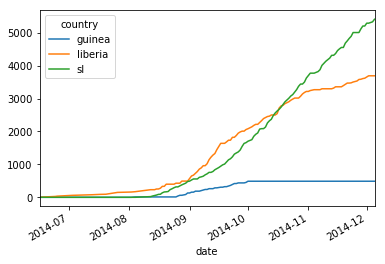

In [59]:
daily_cases.unstack().T.fillna(0).sort_index().cumsum(0).plot()

## Resampling

An alternative to filling days without case reports with zeros is to aggregate the data at a coarser time scale. New cases are often reported by week; we can use the `resample` method to summarize the data into weekly values.

In [60]:
weekly_cases = daily_cases.unstack().T.resample('W').sum()
weekly_cases

country,guinea,liberia,sl
date,,,
2014-06-22,0.0,20.0,0.0
2014-06-29,0.0,28.0,0.0
2014-07-06,0.0,12.0,0.0
2014-07-13,0.0,18.0,0.0
2014-07-20,0.0,15.0,0.0
2014-07-27,0.0,56.0,0.0
2014-08-03,0.0,11.0,0.0
2014-08-10,11.0,10.0,0.0
2014-08-17,0.0,106.0,92.0


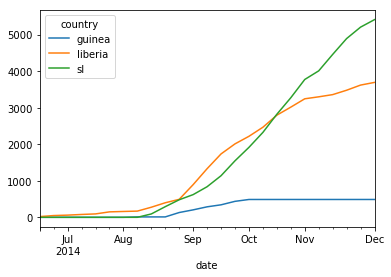

In [61]:
weekly_cases.cumsum().plot()

---

## To Learn More

- [Python data analysis course for 2017 NGCM Summer Academy](https://github.com/fonnesbeck/ngcm_pandas_2017)
- [Python for Data Analysis](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney